# Simulation & Data Comparison [Validation]
### Milo @ SSL - UC Berkeley
### December 2018

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 
import matplotlib 
from astropy.io import fits
import ast
import matplotlib.patches as patches
import astropy.units as u
import skimage.transform
from foxsisim.util import load_rays
from foxsisim.detector import Detector


## Scale:

In [2]:
CCD_PIXEL_PITCH = 13.5 * u.micron
binning = 2.
distance = 2. * u.m
s = np.arctan(binning * CCD_PIXEL_PITCH / distance).to(u.arcmin)
resol = 1024
Dwidth=8.25/s.value #detector width in pixels
Flux_X2_low, Flux_X2_up = [], []
Flux_X2N_low, Flux_X2N_up = [], []
power = np.array([0.85,0.65,0.5,0.3,0.1,0.03])/0.03
offaxis = [30.,26.,22.,18.,14.,10.]

In [32]:
'''Scale and Center Parameters'''
X, Y = 0., -30.
X0, Y0 = 443, 83 ## Calib Sep 2017
X1, Y1 = 384, 272 ## Calib Mar 2018
angle0 = 1.0
#angle1 = 10.0
angle1 = 12.0

In [35]:
# Loading Rays:
Lrays = load_rays('/Volumes/Pandora/Developer/Milo_RayTracing/1millionRays/100m/30arcmin/SimDataComp_rays.csv')
# Fix little bug in rays:
for ray in Lrays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Lrays)
    
'''Defining D, H, and P rays for each blocker size: '''
Drays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==2 )]
Srays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==0 and ray.tag[-8:] == 'Source-D')]
Hrays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 1.0    # 1cm = 17.4 arcmin
sim_scale = 17.4    # 1cm = 17.4 arcmin

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale)
    Hy.append(ray.pos[1]*sim_scale)
        
# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale)
    Py.append(ray.pos[1]*sim_scale)

# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale)
    Dy.append(ray.pos[1]*sim_scale)

# StraightThrough
Sx, Sy = [], []
for ray in Srays:
    Sx.append(ray.pos[0]*sim_scale)
    Sy.append(ray.pos[1]*sim_scale)


Rays from /Volumes/Pandora/Developer/Milo_RayTracing/1millionRays/100m/30arcmin/SimDataComp_rays.csv loaded.


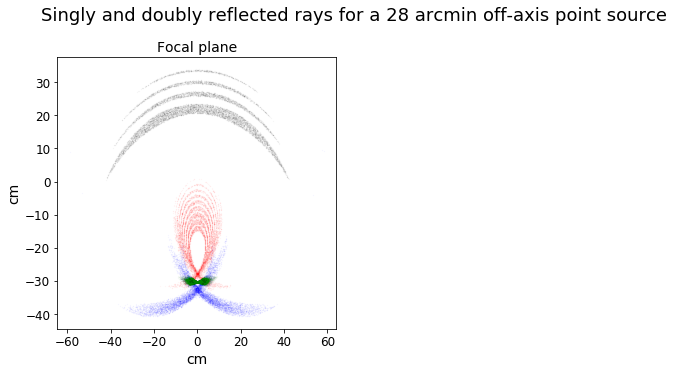

In [16]:
fig = plt.figure(figsize=(11,5))
st = fig.suptitle("Singly and doubly reflected rays for a 28 arcmin off-axis point source", fontsize=18,y=1.02)
plt.subplot(1,2,1)
plt.title('Focal plane',fontsize=14)
plt.xlabel('cm',fontsize=14);plt.ylabel('cm',fontsize=14)
plt.yticks(fontsize=12);plt.xticks(fontsize=12)
plt.scatter(Hx[0:10000],Hy[0:10000],color='red',s=0.1,alpha=0.05)
plt.scatter(Px[0:10000],Py[0:10000],color='blue',s=0.1,alpha=0.05)
plt.scatter(Dx[0:10000],Dy[0:10000],color='green',s=0.1,alpha=0.05)
plt.scatter(Sx[0:10000],Sy[0:10000],color='black',s=0.1,alpha=0.05 )
#plt.ylim(-2.0,.7)
#plt.xlim(-2.0,.7)
#ax = plt.gca()
#ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
#ax.add_patch(plt.Circle((0, 0), 0.03, color='k',fill=True,linewidth=.3))
#ax.annotate('Optical axis',xy=[0.01,0.03],xytext=(-20, 30),
#            textcoords='offset points',arrowprops=dict(
#                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
#                facecolor='k'))

In [13]:
len(Drays)

127182

## X2 10-Shell - New Blockers

In [33]:
'''Darks'''
FitsDarks1 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks1_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks1 = np.average(FitsDarks1[0].data, axis=0)
FitsDarks2 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks2_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks2 = np.average(FitsDarks2[0].data, axis=0)
FitsDarks3 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/Darks_X2_NewBlockers/Darks3_FOXSI3_X2_NewBlockers_CCD_T6Sx6_10kV_0p02mA_0arcminX_0arcminY.fits')
Darks3 = np.average(FitsDarks3[0].data, axis=0)
DarksC = (Darks1 + Darks2 + Darks3)/3.
'''Data'''
CF_Xm0_Ym30 = fits.open('/Volumes/Pandora/FOXSI/OpCal/FOXSI-3_2018Mar/X2-10Shells_NewBlockers/GhostRays/FOXSI3_X2_NewBlockers_CCD_T6Sx6_30kV_0p85mA_-6arcminX_-30arcminY.fits')
CD_X0_Ym30 = np.average(CF_Xm0_Ym30[0].data, axis=0)
DX2N_X0_Ym30 = skimage.transform.rotate(((CD_X0_Ym30-DarksC)/(CD_X0_Ym30-DarksC).max()),angle1,center=(X1,Y1))

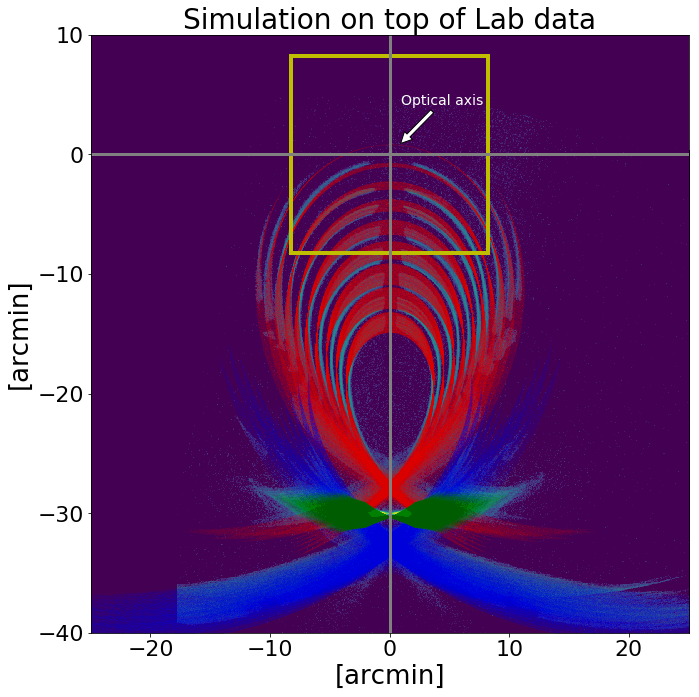

In [71]:
'''Plotting'''
fig = plt.figure(figsize=(14,11))
ax = fig.add_subplot(111, aspect='equal')

## homogenizing background
ax.imshow(np.zeros((20, 20)),extent=[-25,25,-40,10],cmap='viridis')
## Lab Data
ax.imshow(abs(DX2N_X0_Ym30), origin='lower',cmap='viridis', 
          norm=matplotlib.colors.LogNorm(),
          extent=[-X1*s.value+X,(-X1+resol)*s.value+X,-Y1*s.value+Y,(-Y1+resol)*s.value+Y],
          vmin=0.001,vmax=.9)

## Sim Data
ax.scatter(Hx,Hy,color='red',s=0.001,alpha=0.3)
ax.scatter(Px,Py,color='blue',s=0.001,alpha=0.3)
ax.scatter(Dx,Dy,color='green',s=0.001,alpha=0.3)
ax.scatter(Sx,Sy,color='black',s=0.001,alpha=0.3)

## Hornaments
rect = patches.Rectangle((-8.25,-8.25),16.5,16.5,linewidth=4,edgecolor='y',facecolor='none')
ax.add_patch(rect)
ax.annotate('Optical axis',xy=[.8,.8],xytext=(2, 40),color='white',fontsize=14,
            textcoords='offset points',arrowprops=dict(
                arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='white'))
ax.set_xlim((-25,25))
ax.set_ylim((-40,10))
ax.set_xlabel('[arcmin]',fontsize=26)
ax.set_ylabel('[arcmin]',fontsize=26)
#ax.set_title('30 arcmin off-axis source - Lab data', fontsize=28)
ax.set_title('Simulation on top of Lab data', fontsize=28)
ax.tick_params(labelsize=14)
ax.axvline(0,color='grey',linewidth=3)
ax.axhline(0,color='grey',linewidth=3)
ax.tick_params(axis="x", labelsize=22);ax.tick_params(axis="y", labelsize=22)
